Working with audio data: Data contains audio files from 3 different speakers saying the digits (0-9) 50 times.
    Digit classification: Identify the digit (0-9) being spoken from the audio file 
    Speaker classification: Identify the speaker from audio file

Step 1: Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import sounddevice as sd
from IPython.display import Audio

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

Reading and exploring data files

In [2]:
file1 = '1_jackson_0.wav'
file2 = '1_nicolas_0.wav'
file3 = '1_theo_0.wav'
file4 = '2_jackson_0.wav'
file5 = '2_nicolas_0.wav'
file6 = '2_theo_0.wav'
file7 = '3_jackson_0.wav'
file8 = '3_nicolas_0.wav'
file9 = '3_theo_0.wav'
ld1, lsr1 = librosa.load(file1)
ld2, lsr2 = librosa.load(file2)
ld3, lsr3 = librosa.load(file3)
ld4, lsr4 = librosa.load(file4)
ld5, lsr5 = librosa.load(file5)
ld6, lsr6 = librosa.load(file6)
ld7, lsr7 = librosa.load(file7)
ld8, lsr8 = librosa.load(file8)
ld9, lsr9 = librosa.load(file9)

Text(0.5, 1.0, 'all speakers saying two')

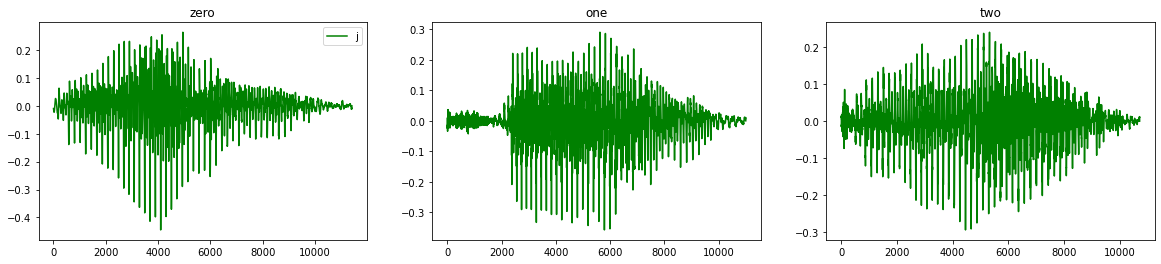

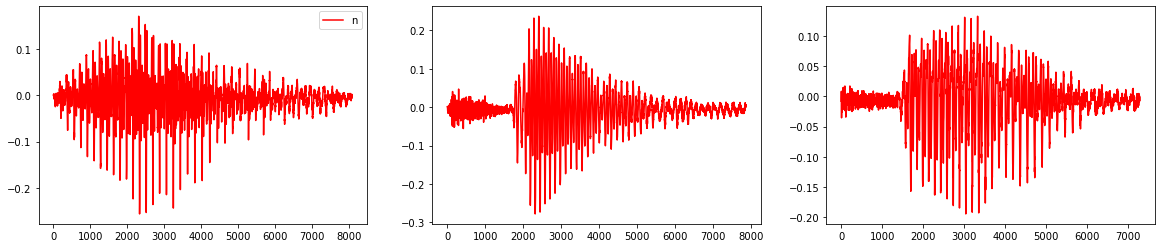

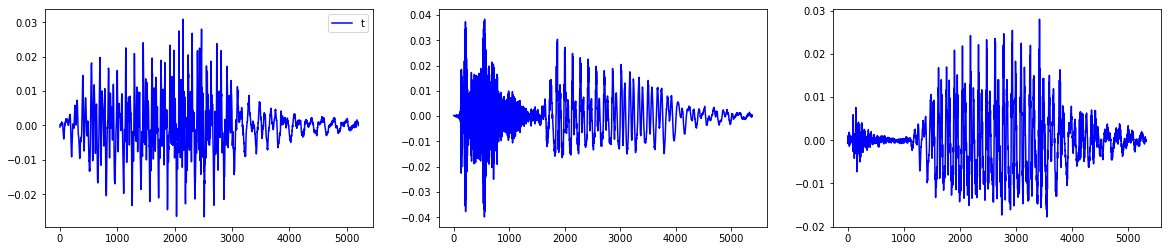

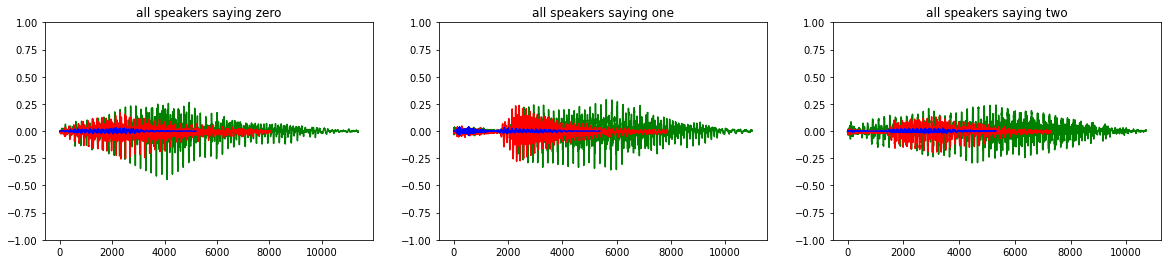

In [3]:
fig1, (ax11, ax12, ax13) = plt.subplots(ncols=3, figsize=(20, 4))
fig2, (ax21, ax22, ax23) = plt.subplots(ncols=3, figsize=(20, 4))
fig3, (ax31, ax32, ax33) = plt.subplots(ncols=3, figsize=(20, 4))
fig4, (ax41, ax42, ax43) = plt.subplots(ncols=3, figsize=(20, 4))
ax11.plot(ld1, label = 'j', color = 'green')
ax21.plot(ld2, label = 'n', color = 'red')
ax31.plot(ld3, label = 't', color = 'blue')
ax12.plot(ld4, label = 'j', color = 'green')
ax22.plot(ld5, label = 'n', color = 'red')
ax32.plot(ld6, label = 't', color = 'blue')
ax13.plot(ld7, label = 'j', color = 'green')
ax23.plot(ld8, label = 'n', color = 'red')
ax33.plot(ld9, label = 't', color = 'blue')
ax41.plot(ld1, label = 'j', color = 'green')
ax41.plot(ld2, label = 'n', color = 'red')
ax41.plot(ld3, label = 't', color = 'blue')
ax42.plot(ld4, label = 'j', color = 'green')
ax42.plot(ld5, label = 'n', color = 'red')
ax42.plot(ld6, label = 't', color = 'blue')
ax43.plot(ld7, label = 'j', color = 'green')
ax43.plot(ld8, label = 'n', color = 'red')
ax43.plot(ld9, label = 't', color = 'blue')
ax11.legend()
ax21.legend()
ax31.legend()

ax41.set_ylim(-1, 1)
ax42.set_ylim(-1, 1)
ax43.set_ylim(-1, 1)
ax11.set_title('zero')
ax12.set_title('one')
ax13.set_title('two')
ax41.set_title('all speakers saying zero')
ax42.set_title('all speakers saying one')
ax43.set_title('all speakers saying two')

Function to normalise length and extract features from audio files

In [4]:
def transformaudiotoinput(F):
    ld, lsr = librosa.load(F)
    n = len(ld)
    # for 0, 1 and 2, the max ld size is 17290!
    extra = [0 for i in range(50500-len(ld))]
    ld = np.append(ld, extra)
    mfccs = librosa.feature.mfcc(y = ld, n_mfcc = 15, sr = lsr)
    sc = librosa.feature.spectral_centroid(y = ld)
    sb = librosa.feature.spectral_bandwidth(y = ld)
    av = np.mean(mfccs, axis=0)
    #t = [[n] for i in range(15)]
    temp = np.vstack((mfccs, av, sb, sc))
    return temp
  

Separating data files into arrays based on the digit being spoken

In [5]:
zeros = np.array([])
for i in os.listdir():
    if i[:2] == '0_' and i[-6] == '_':
        zeros = np.append(zeros, i)
for i in os.listdir():
    if i[:2] == '0_' and i[-7] == '_':
        zeros = np.append(zeros, i)

ones = np.array([])
for i in os.listdir():
    if i[:2] == '1_' and i[-6] == '_':
        ones = np.append(ones, i)
for i in os.listdir():
    if i[:2] == '1_' and i[-7] == '_':
        ones = np.append(ones, i)
        
twos = np.array([])
for i in os.listdir():
    if i[:2] == '2_' and i[-6] == '_':
        twos = np.append(twos, i)
for i in os.listdir():
    if i[:2] == '2_' and i[-7] == '_':
        twos = np.append(twos, i)

threes = np.array([])
for i in os.listdir():
    if i[:2] == '3_' and i[-6] == '_':
        threes = np.append(threes, i)
for i in os.listdir():
    if i[:2] == '3_' and i[-7] == '_':
        threes = np.append(threes, i)

fours = np.array([])
for i in os.listdir():
    if i[:2] == '4_' and i[-6] == '_':
        fours = np.append(fours, i)
for i in os.listdir():
    if i[:2] == '4_' and i[-7] == '_':
        fours = np.append(fours, i)
        
fives = np.array([])
for i in os.listdir():
    if i[:2] == '5_' and i[-6] == '_':
        fives = np.append(fives, i)
for i in os.listdir():
    if i[:2] == '5_' and i[-7] == '_':
        fives = np.append(fives, i)
        
sixes = np.array([])
for i in os.listdir():
    if i[:2] == '6_' and i[-6] == '_':
        sixes = np.append(sixes, i)
for i in os.listdir():
    if i[:2] == '6_' and i[-7] == '_':
        sixes = np.append(sixes, i)        

sevens = np.array([])
for i in os.listdir():
    if i[:2] == '7_' and i[-6] == '_':
        sevens = np.append(sevens, i)
for i in os.listdir():
    if i[:2] == '7_' and i[-7] == '_':
        sevens = np.append(sevens, i)

eights = np.array([])
for i in os.listdir():
    if i[:2] == '8_' and i[-6] == '_':
        eights = np.append(eights, i)
for i in os.listdir():
    if i[:2] == '8_' and i[-7] == '_':
        eights = np.append(eights, i)

nines = np.array([])
for i in os.listdir():
    if i[:2] == '9_' and i[-6] == '_':
        nines = np.append(nines, i)
for i in os.listdir():
    if i[:2] == '9_' and i[-7] == '_':
        nines = np.append(nines, i)
        

Preparing training and test data

In [6]:
X_train_0 = transformaudiotoinput('0_jackson_10.wav')
X_test_0 = transformaudiotoinput('0_jackson_0.wav')
for i in zeros[31:]:
    temp = transformaudiotoinput(i)
    X_train_0 = np.concatenate([X_train_0,temp])
for i in zeros[1:30]:
    temp = transformaudiotoinput(i)
    X_test_0 = np.concatenate([X_test_0,temp])

X_train_1 = transformaudiotoinput('1_jackson_10.wav')
X_test_1 = transformaudiotoinput('1_jackson_0.wav')
for i in ones[31:]:
    temp = transformaudiotoinput(i)
    X_train_1 = np.concatenate([X_train_1,temp])
for i in ones[1:30]:
    temp = transformaudiotoinput(i)
    X_test_1 = np.concatenate([X_test_1,temp])

X_train_2 = transformaudiotoinput('2_jackson_10.wav')
X_test_2 = transformaudiotoinput('2_jackson_0.wav')
for i in twos[31:]:
    temp = transformaudiotoinput(i)
    X_train_2 = np.concatenate([X_train_2,temp])
for i in twos[1:30]:
    temp = transformaudiotoinput(i)
    X_test_2 = np.concatenate([X_test_2,temp])

X_train_3 = transformaudiotoinput('3_jackson_10.wav')
X_test_3 = transformaudiotoinput('3_jackson_0.wav')
for i in threes[31:]:
    temp = transformaudiotoinput(i)
    X_train_3 = np.concatenate([X_train_3,temp])
for i in threes[1:30]:
    temp = transformaudiotoinput(i)
    X_test_3 = np.concatenate([X_test_3,temp])
print('3 done')

X_train_4 = transformaudiotoinput('4_jackson_10.wav')
X_test_4 = transformaudiotoinput('4_jackson_0.wav')
for i in fours[31:]:
    temp = transformaudiotoinput(i)
    X_train_4 = np.concatenate([X_train_4,temp])
for i in fours[1:30]:
    temp = transformaudiotoinput(i)
    X_test_4 = np.concatenate([X_test_4,temp])

X_train_5 = transformaudiotoinput('5_jackson_10.wav')
X_test_5 = transformaudiotoinput('5_jackson_0.wav')
for i in fives[31:]:
    temp = transformaudiotoinput(i)
    X_train_5 = np.concatenate([X_train_5,temp])
for i in fives[1:30]:
    temp = transformaudiotoinput(i)
    X_test_5 = np.concatenate([X_test_5,temp])

X_train_6 = transformaudiotoinput('6_jackson_10.wav')
X_test_6 = transformaudiotoinput('6_jackson_0.wav')
for i in sixes[31:]:
    temp = transformaudiotoinput(i)
    X_train_6 = np.concatenate([X_train_6,temp])
for i in sixes[1:30]:
    temp = transformaudiotoinput(i)
    X_test_6 = np.concatenate([X_test_6,temp])
print('6 done')    
    
X_train_7 = transformaudiotoinput('7_jackson_10.wav')
X_test_7 = transformaudiotoinput('7_jackson_0.wav')
for i in sevens[31:]:
    temp = transformaudiotoinput(i)
    X_train_7 = np.concatenate([X_train_7,temp])
for i in sevens[1:30]:
    temp = transformaudiotoinput(i)
    X_test_7 = np.concatenate([X_test_7,temp]) 

X_train_8 = transformaudiotoinput('8_jackson_10.wav')
X_test_8 = transformaudiotoinput('8_jackson_0.wav')
for i in eights[31:]:
    temp = transformaudiotoinput(i)
    X_train_8 = np.concatenate([X_train_8,temp])
for i in eights[1:30]:
    temp = transformaudiotoinput(i)
    X_test_8 = np.concatenate([X_test_8,temp])

X_train_9 = transformaudiotoinput('9_jackson_10.wav')
X_test_9 = transformaudiotoinput('9_jackson_0.wav')
for i in nines[31:]:
    temp = transformaudiotoinput(i)
    X_train_9 = np.concatenate([X_train_9,temp])
for i in nines[1:30]:
    temp = transformaudiotoinput(i)
    X_test_9 = np.concatenate([X_test_9,temp])
print('all done')

3 done
6 done
all done


y0 - y9 as labels for the digits, and y12-y14 as labels for the speakers

In [7]:
y0 = [0 for i in range(150)]
y1 = [1 for i in range(150)]
y2 = [2 for i in range(150)]
y3 = [3 for i in range(150)]
y4 = [4 for i in range(150)]
y5 = [5 for i in range(150)]
y6 = [6 for i in range(150)]
y7 = [7 for i in range(150)]
y8 = [8 for i in range(150)]
y9 = [9 for i in range(150)]

y12 = [12 for i in range(50)]
y13 = [13 for i in range(50)]
y14 = [14 for i in range(50)]

Training and testing data for digit classification

In [8]:
X_train = np.concatenate([X_train_0, X_train_1, X_train_2, X_train_3, X_train_4, X_train_5, 
                          X_train_6, X_train_7, X_train_8, X_train_9])
X_test = np.concatenate([X_test_0, X_test_1, X_test_2, X_test_3, X_test_4, X_test_5, 
                         X_test_6, X_test_7, X_test_8, X_test_9])
y_train = np.concatenate([y0[30:], y1[30:], y2[30:], y3[30:], y4[30:], y5[30:], y6[30:], y7[30:], y8[30:], y9[30:]])
y_test = np.concatenate([y0[:30], y1[:30], y2[:30], y3[:30], y4[:30], y5[:30], y6[:30], y7[:30], y8[:30], y9[:30]])

Training and test labels for speaker classification

In [9]:
y_train2 = np.concatenate([y12[10:], y13[10:], y14[10:], y12[10:], y13[10:], y14[10:], y12[10:], y13[10:], y14[10:],
                           y12[10:], y13[10:], y14[10:], y12[10:], y13[10:], y14[10:], y12[10:], y13[10:], y14[10:],
                           y12[10:], y13[10:], y14[10:], y12[10:], y13[10:], y14[10:], y12[10:], y13[10:], y14[10:],
                           y12[10:], y13[10:], y14[10:]])
y_test2 = np.concatenate([y12[:10], y13[:10], y14[:10], y12[:10], y13[:10], y14[:10], y12[:10], y13[:10], y14[:10], 
                          y12[:10], y13[:10], y14[:10], y12[:10], y13[:10], y14[:10], y12[:10], y13[:10], y14[:10], 
                          y12[:10], y13[:10], y14[:10], y12[:10], y13[:10], y14[:10], y12[:10], y13[:10], y14[:10],  
                          y12[:10], y13[:10], y14[:10]])

We have 18 features in total (15 mfccs, average of mfccs, spectral centroid and spectral width), hence the first training and fit (i = 0) is for zeros, the second is for ones (i = 1)  and so on..

In [10]:
#using SVM, KNN, RFC
prediction1 = np.array([])
prediction2 = np.array([])
prediction3 = np.array([])
prediction4 = np.array([])
prediction5 = np.array([])
prediction6 = np.array([])
i = 0
while i<18:
    stdsclr = StandardScaler()
    X_train_temp = X_train[i::18, :]
    X_test_temp = X_test[i::18, :]
    X_train_temp_scaled = stdsclr.fit_transform(X_train_temp)
    X_test_temp_scaled = stdsclr.transform(X_test_temp)
    model1 = SVC(kernel='rbf')
    model2 = SVC(kernel='rbf')
    model3 = KNeighborsClassifier(n_neighbors = 5)
    model4 = KNeighborsClassifier(n_neighbors = 5)
    model5 = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=8)
    model6 = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=8)
    model1.fit(X_train_temp_scaled, y_train)
    model2.fit(X_train_temp_scaled, y_train2)
    model3.fit(X_train_temp_scaled, y_train)
    model4.fit(X_train_temp_scaled, y_train2)
    model5.fit(X_train_temp_scaled, y_train)
    model6.fit(X_train_temp_scaled, y_train2)
    pred1 = model1.predict(X_test_temp_scaled)
    pred2 = model2.predict(X_test_temp_scaled)
    pred3 = model3.predict(X_test_temp_scaled)
    pred4 = model4.predict(X_test_temp_scaled)
    pred5 = model5.predict(X_test_temp_scaled)
    pred6 = model6.predict(X_test_temp_scaled)
    prediction1 = np.append(prediction1, pred1)
    prediction2 = np.append(prediction2, pred2)
    prediction3 = np.append(prediction3, pred3)
    prediction4 = np.append(prediction4, pred4)
    prediction5 = np.append(prediction5, pred5)
    prediction6 = np.append(prediction6, pred6)
    #print(i)
    i+=1


In [11]:
pp1 = prediction1.reshape(18, -1)
pp2 = prediction2.reshape(18, -1)
pp3 = prediction3.reshape(18, -1)
pp4 = prediction4.reshape(18, -1)
pp5 = prediction5.reshape(18, -1)
pp6 = prediction6.reshape(18, -1)
pp1 = pd.DataFrame(pp1)
pp2 = pd.DataFrame(pp2)
pp3 = pd.DataFrame(pp3)
pp4 = pd.DataFrame(pp4)
pp5 = pd.DataFrame(pp5)
pp6 = pd.DataFrame(pp6)

Taking the final prediction as mode of predictions from the 18 features!

In [12]:
pred1 = pp1.mode(axis=0)
pred2 = pp2.mode(axis=0)
pred3 = pp3.mode(axis=0)
pred4 = pp4.mode(axis=0)
pred5 = pp5.mode(axis=0)
pred6 = pp6.mode(axis=0)

In [13]:
print('Classification_report for Digit classification using SVM:')
print(classification_report(pred1.iloc[0], y_test)) 
print('Classification_report for Digit classification using KNN:')
print(classification_report(pred3.iloc[0], y_test)) 
print('Classification_report for Digit classification using RFC:')
print(classification_report(pred5.iloc[0], y_test)) 
print('Classification_report for speaker classification using SVM:')
print(classification_report(pred2.iloc[0], y_test2)) 
print('Classification_report for speaker classification using KNN:')
print(classification_report(pred4.iloc[0], y_test2))
print('Classification_report for speaker classification using RFC:')
print(classification_report(pred6.iloc[0], y_test2))

Classification_report for Digit classification using SVM:
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82        31
         1.0       0.97      0.67      0.79        43
         2.0       0.93      0.78      0.85        36
         3.0       0.80      0.67      0.73        36
         4.0       0.80      0.96      0.87        25
         5.0       0.97      0.94      0.95        31
         6.0       0.63      0.95      0.76        20
         7.0       0.80      0.89      0.84        27
         8.0       0.67      0.80      0.73        25
         9.0       0.87      1.00      0.93        26

    accuracy                           0.83       300
   macro avg       0.83      0.85      0.83       300
weighted avg       0.84      0.83      0.83       300

Classification_report for Digit classification using KNN:
              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87        34
         1.0    

Other classification reports using less features

Using 15 mfccs only, svm knn and rfc, number (10) and speaker (3)
precision    recall  f1-score   support

         0.0       0.87      0.74      0.80        35
         1.0       0.93      0.67      0.78        42
         2.0       0.93      0.80      0.86        35
         3.0       0.83      0.71      0.77        35
         4.0       0.80      0.89      0.84        27
         5.0       0.97      0.94      0.95        31
         6.0       0.57      1.00      0.72        17
         7.0       0.83      0.89      0.86        28
         8.0       0.67      0.87      0.75        23
         9.0       0.90      1.00      0.95        27

    accuracy                           0.83       300
   macro avg       0.83      0.85      0.83       300
weighted avg       0.85      0.83      0.83       300

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90        32
         1.0       1.00      0.79      0.88        38
         2.0       0.97      0.81      0.88        36
         3.0       0.77      0.74      0.75        31
         4.0       1.00      0.94      0.97        32
         5.0       0.97      1.00      0.98        29
         6.0       0.80      0.92      0.86        26
         7.0       0.83      0.93      0.88        27
         8.0       0.70      1.00      0.82        21
         9.0       0.90      0.96      0.93        28

    accuracy                           0.89       300
   macro avg       0.89      0.90      0.89       300
weighted avg       0.90      0.89      0.89       300

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        31
         1.0       0.97      0.83      0.89        35
         2.0       0.97      0.85      0.91        34
         3.0       0.90      0.84      0.87        32
         4.0       1.00      0.94      0.97        32
         5.0       0.97      0.94      0.95        31
         6.0       0.83      0.86      0.85        29
         7.0       0.90      1.00      0.95        27
         8.0       0.70      1.00      0.82        21
         9.0       0.87      0.93      0.90        28

    accuracy                           0.91       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300

              precision    recall  f1-score   support

        12.0       0.94      0.96      0.95        98
        13.0       0.93      0.80      0.86       116
        14.0       0.82      0.95      0.88        86

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

              precision    recall  f1-score   support

        12.0       0.99      0.99      0.99       100
        13.0       0.99      0.89      0.94       111
        14.0       0.88      0.99      0.93        89

    accuracy                           0.95       300
   macro avg       0.95      0.96      0.95       300
weighted avg       0.96      0.95      0.95       300

              precision    recall  f1-score   support

        12.0       0.97      0.98      0.97        99
        13.0       0.96      0.98      0.97        98
        14.0       0.99      0.96      0.98       103

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Using 15 mfccs and length of audio, svm knn and rfc, number (10) and speaker (3)
              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77        35
         1.0       0.97      0.72      0.83        40
         2.0       0.90      0.82      0.86        33
         3.0       0.83      0.68      0.75        37
         4.0       0.83      0.93      0.88        27
         5.0       0.97      0.94      0.95        31
         6.0       0.57      1.00      0.72        17
         7.0       0.83      0.86      0.85        29
         8.0       0.67      0.83      0.74        24
         9.0       0.90      1.00      0.95        27

    accuracy                           0.83       300
   macro avg       0.83      0.85      0.83       300
weighted avg       0.85      0.83      0.83       300

              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89        33
         1.0       1.00      0.77      0.87        39
         2.0       0.97      0.78      0.87        37
         3.0       0.77      0.77      0.77        30
         4.0       0.97      0.97      0.97        30
         5.0       0.93      1.00      0.97        28
         6.0       0.80      0.92      0.86        26
         7.0       0.87      0.93      0.90        28
         8.0       0.70      1.00      0.82        21
         9.0       0.90      0.96      0.93        28

    accuracy                           0.88       300
   macro avg       0.88      0.90      0.88       300
weighted avg       0.90      0.88      0.88       300

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        28
         1.0       1.00      0.79      0.88        38
         2.0       1.00      0.91      0.95        33
         3.0       0.87      0.76      0.81        34
         4.0       1.00      0.94      0.97        32
         5.0       0.97      0.97      0.97        30
         6.0       0.90      0.90      0.90        30
         7.0       0.80      0.92      0.86        26
         8.0       0.67      0.95      0.78        21
         9.0       0.90      0.96      0.93        28

    accuracy                           0.90       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.92      0.90      0.90       300

              precision    recall  f1-score   support

        12.0       0.95      0.96      0.95        99
        13.0       0.95      0.83      0.88       115
        14.0       0.83      0.97      0.89        86

    accuracy                           0.91       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300

              precision    recall  f1-score   support

        12.0       0.99      0.97      0.98       102
        13.0       0.99      0.90      0.94       110
        14.0       0.87      0.99      0.93        88

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

              precision    recall  f1-score   support

        12.0       0.98      0.98      0.98       100
        13.0       0.96      0.97      0.96        99
        14.0       0.98      0.97      0.98       101

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Using 15 mfccs, sc and sb, svm knn and rfc, number (10) and speaker (3)

          precision    recall  f1-score   support

         0.0       0.83      0.78      0.81        32
         1.0       0.93      0.68      0.79        41
         2.0       0.93      0.78      0.85        36
         3.0       0.80      0.67      0.73        36
         4.0       0.80      0.92      0.86        26
         5.0       0.97      0.88      0.92        33
         6.0       0.60      0.95      0.73        19
         7.0       0.80      0.89      0.84        27
         8.0       0.67      0.80      0.73        25
         9.0       0.83      1.00      0.91        25

    accuracy                           0.82       300
   macro avg       0.82      0.83      0.82       300
weighted avg       0.84      0.82      0.82       300

              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89        33
         1.0       1.00      0.71      0.83        42
         2.0       0.97      0.76      0.85        38
         3.0       0.73      0.76      0.75        29
         4.0       0.93      1.00      0.97        28
         5.0       0.93      1.00      0.97        28
         6.0       0.83      0.93      0.88        27
         7.0       0.83      0.93      0.88        27
         8.0       0.70      1.00      0.82        21
         9.0       0.90      1.00      0.95        27

    accuracy                           0.88       300
   macro avg       0.88      0.89      0.88       300
weighted avg       0.89      0.88      0.88       300

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        30
         1.0       1.00      0.83      0.91        36
         2.0       1.00      0.91      0.95        33
         3.0       0.93      0.82      0.87        34
         4.0       1.00      1.00      1.00        30
         5.0       0.97      0.97      0.97        30
         6.0       0.87      0.93      0.90        28
         7.0       0.93      0.97      0.95        29
         8.0       0.70      0.91      0.79        23
         9.0       0.90      1.00      0.95        27

    accuracy                           0.92       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.92      0.92       300

              precision    recall  f1-score   support

        12.0       0.91      0.95      0.93        96
        13.0       0.93      0.79      0.86       117
        14.0       0.84      0.97      0.90        87

    accuracy                           0.89       300
   macro avg       0.89      0.90      0.89       300
weighted avg       0.90      0.89      0.89       300

              precision    recall  f1-score   support

        12.0       0.99      0.99      0.99       100
        13.0       1.00      0.92      0.96       109
        14.0       0.91      1.00      0.95        91

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

              precision    recall  f1-score   support

        12.0       0.98      0.97      0.98       101
        13.0       0.97      0.98      0.97        99
        14.0       0.99      0.99      0.99       100

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Using 20 mfccs, sc and sb, svm knn and rfc, number (10) and speaker (3)
            precision    recall  f1-score   support

         0.0       0.83      0.86      0.85        29
         1.0       0.93      0.72      0.81        39
         2.0       0.90      0.77      0.83        35
         3.0       0.80      0.63      0.71        38
         4.0       0.80      0.83      0.81        29
         5.0       0.97      0.88      0.92        33
         6.0       0.67      0.91      0.77        22
         7.0       0.80      0.86      0.83        28
         8.0       0.67      0.87      0.75        23
         9.0       0.80      1.00      0.89        24

    accuracy                           0.82       300
   macro avg       0.82      0.83      0.82       300
weighted avg       0.83      0.82      0.82       300

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87        34
         1.0       1.00      0.75      0.86        40
         2.0       0.97      0.78      0.87        37
         3.0       0.73      0.69      0.71        32
         4.0       1.00      0.94      0.97        32
         5.0       0.93      1.00      0.97        28
         6.0       0.80      1.00      0.89        24
         7.0       0.83      0.93      0.88        27
         8.0       0.67      1.00      0.80        20
         9.0       0.87      1.00      0.93        26

    accuracy                           0.87       300
   macro avg       0.87      0.89      0.87       300
weighted avg       0.89      0.87      0.87       300

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        29
         1.0       0.97      0.88      0.92        33
         2.0       0.97      0.88      0.92        33
         3.0       0.87      0.68      0.76        38
         4.0       1.00      0.97      0.98        31
         5.0       0.97      0.94      0.95        31
         6.0       0.87      0.93      0.90        28
         7.0       0.83      0.89      0.86        28
         8.0       0.70      1.00      0.82        21
         9.0       0.90      0.96      0.93        28

    accuracy                           0.90       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.91      0.90      0.90       300

              precision    recall  f1-score   support

        12.0       0.92      0.97      0.94        95
        13.0       0.96      0.82      0.88       117
        14.0       0.86      0.98      0.91        88

    accuracy                           0.91       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300

              precision    recall  f1-score   support

        12.0       0.98      0.98      0.98       100
        13.0       1.00      0.93      0.96       108
        14.0       0.92      1.00      0.96        92

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

              precision    recall  f1-score   support

        12.0       0.98      0.97      0.98       101
        13.0       0.97      0.98      0.97        99
        14.0       0.99      0.99      0.99       100

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Using 15 mfccs, sc and sb and av of mfccs, svm knn and rfc, number (10) and speaker (3)
         precision    recall  f1-score   support

         0.0       0.83      0.86      0.85        29
         1.0       0.93      0.72      0.81        39
         2.0       0.90      0.77      0.83        35
         3.0       0.80      0.63      0.71        38
         4.0       0.80      0.83      0.81        29
         5.0       0.97      0.88      0.92        33
         6.0       0.67      0.91      0.77        22
         7.0       0.80      0.86      0.83        28
         8.0       0.67      0.87      0.75        23
         9.0       0.80      1.00      0.89        24

    accuracy                           0.82       300
   macro avg       0.82      0.83      0.82       300
weighted avg       0.83      0.82      0.82       300

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87        34
         1.0       1.00      0.75      0.86        40
         2.0       0.97      0.78      0.87        37
         3.0       0.73      0.69      0.71        32
         4.0       1.00      0.94      0.97        32
         5.0       0.93      1.00      0.97        28
         6.0       0.80      1.00      0.89        24
         7.0       0.83      0.93      0.88        27
         8.0       0.67      1.00      0.80        20
         9.0       0.87      1.00      0.93        26

    accuracy                           0.87       300
   macro avg       0.87      0.89      0.87       300
weighted avg       0.89      0.87      0.87       300

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        29
         1.0       0.97      0.88      0.92        33
         2.0       0.97      0.88      0.92        33
         3.0       0.87      0.68      0.76        38
         4.0       1.00      0.97      0.98        31
         5.0       0.97      0.94      0.95        31
         6.0       0.87      0.93      0.90        28
         7.0       0.83      0.89      0.86        28
         8.0       0.70      1.00      0.82        21
         9.0       0.90      0.96      0.93        28

    accuracy                           0.90       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.91      0.90      0.90       300

              precision    recall  f1-score   support

        12.0       0.92      0.97      0.94        95
        13.0       0.96      0.82      0.88       117
        14.0       0.86      0.98      0.91        88

    accuracy                           0.91       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300

              precision    recall  f1-score   support

        12.0       0.98      0.98      0.98       100
        13.0       1.00      0.93      0.96       108
        14.0       0.92      1.00      0.96        92

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

              precision    recall  f1-score   support

        12.0       0.98      0.97      0.98       101
        13.0       0.97      0.98      0.97        99
        14.0       0.99      0.99      0.99       100

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Some more plots

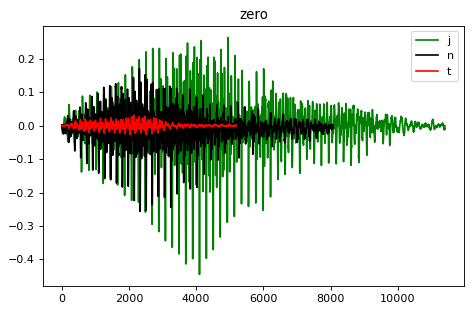

In [14]:
plt.figure(figsize = (6,4), dpi = 80)
plt.plot(ld1, label = 'j', color = 'green')
plt.plot(ld2, label = 'n', color = 'black')
plt.plot(ld3, label = 't', color = 'red')
plt.legend()
#plt.xlabel('time')
#plt.ylabel('Intensity')
#plt.xlim(0,15000)
#plt.ylim(-1,1)
plt.title('zero')
plt.tight_layout()
plt.show()

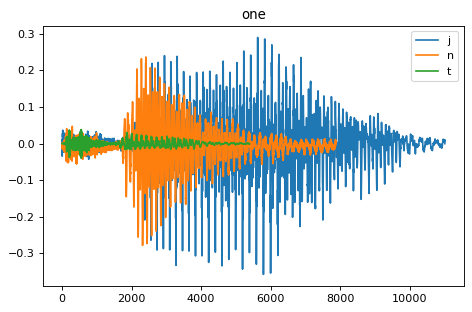

In [15]:
plt.figure(figsize = (6,4), dpi = 80)
plt.plot(ld4, label = 'j')
plt.plot(ld5, label = 'n')
plt.plot(ld6, label = 't')
plt.legend()
#plt.xlabel('time')
#plt.ylabel('Intensity')
#plt.xlim(0,15000)
#plt.ylim(-1,1)
plt.title('one')
plt.tight_layout()
plt.show()

In [16]:
mfccs1 = librosa.feature.mfcc(y = ld1, n_mfcc = 15, sr = lsr1)
mfccs2 = librosa.feature.mfcc(y = ld2, n_mfcc = 15, sr = lsr2)
mfccs3 = librosa.feature.mfcc(y = ld3, n_mfcc = 15, sr = lsr3)
mfccs4 = librosa.feature.mfcc(y = ld4, n_mfcc = 15, sr = lsr4)
mfccs5 = librosa.feature.mfcc(y = ld5, n_mfcc = 15, sr = lsr5)
mfccs6 = librosa.feature.mfcc(y = ld6, n_mfcc = 15, sr = lsr6)
mfccs7 = librosa.feature.mfcc(y = ld7, n_mfcc = 15, sr = lsr7)
mfccs8 = librosa.feature.mfcc(y = ld8, n_mfcc = 15, sr = lsr8)
mfccs9 = librosa.feature.mfcc(y = ld9, n_mfcc = 15, sr = lsr9)

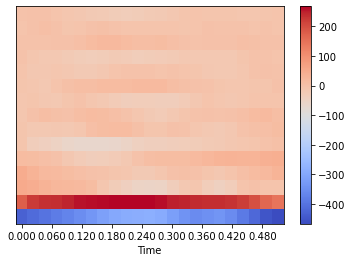

In [17]:
librosa.display.specshow(mfccs1, x_axis = 'time', sr = lsr1)
#librosa.display.specshow(mfccs2, x_axis = 'time', sr = lsr2)
plt.colorbar()
plt.show()


In [18]:
deltamfccs1 = librosa.feature.delta(mfccs1)
delta2mfccs1 = librosa.feature.delta(mfccs1, order = 2)

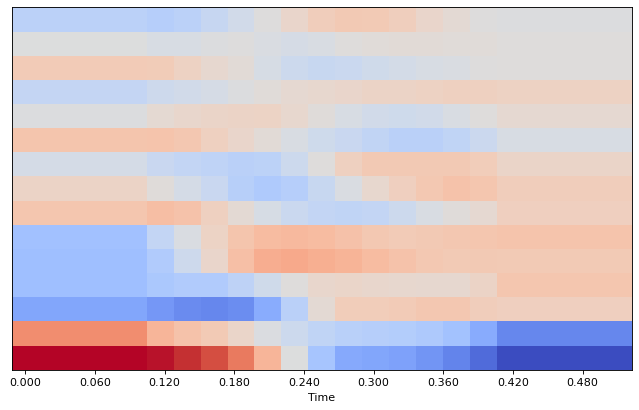

In [19]:
plt.figure(figsize = (10,6), dpi = 80)
librosa.display.specshow(deltamfccs1, x_axis = 'time', sr = lsr1)
plt.show()

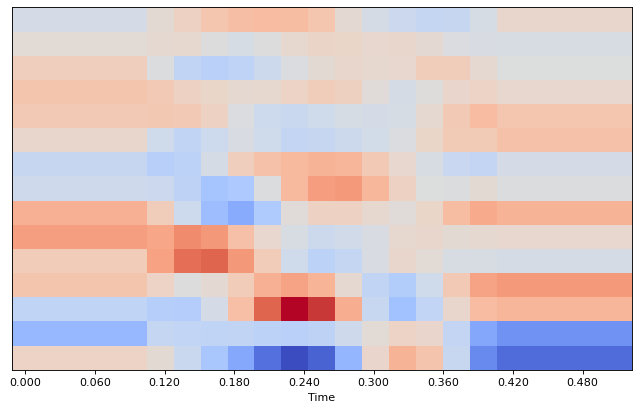

In [20]:
plt.figure(figsize = (10,6), dpi = 80)
librosa.display.specshow(delta2mfccs1, x_axis = 'time', sr = lsr1)
plt.show()

In [21]:
allmfccs1 = np.concatenate((mfccs1, deltamfccs1, delta2mfccs1))
allmfccs1.shape

(45, 23)

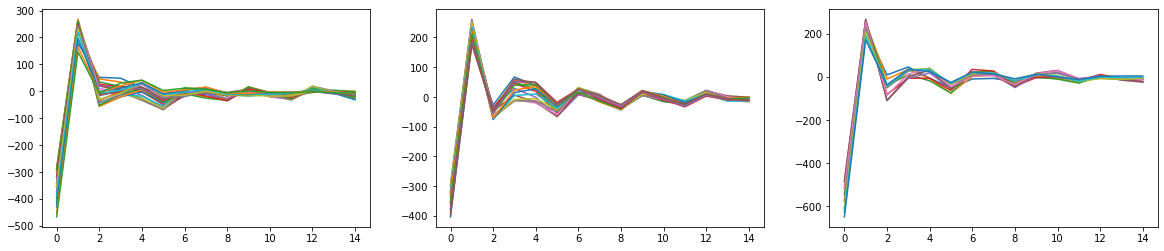

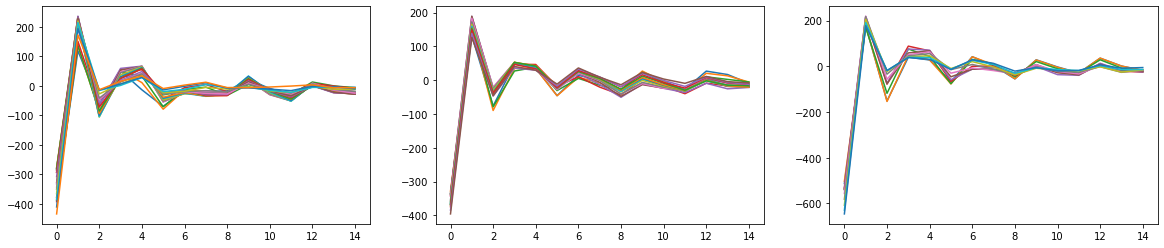

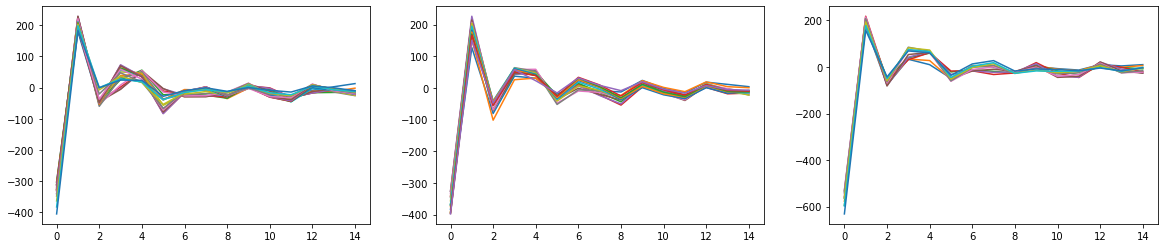

In [22]:
fig1, (ax11, ax12, ax13) = plt.subplots(ncols=3, figsize=(20, 4))
fig2, (ax21, ax22, ax23) = plt.subplots(ncols=3, figsize=(20, 4))
fig3, (ax31, ax32, ax33) = plt.subplots(ncols=3, figsize=(20, 4))
ax11.plot(mfccs1)
ax12.plot(mfccs2)
ax13.plot(mfccs3)
ax21.plot(mfccs4)
ax22.plot(mfccs5)
ax23.plot(mfccs6)
ax31.plot(mfccs7)
ax32.plot(mfccs8)
ax33.plot(mfccs9)
plt.show()